In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from joblib import dump, load

import numpy as np

In [16]:
# Read player model
xl1 = pd.read_csv('data_cleaned/modelSource.csv', index_col=0)
xl1.columns[0:20]

Index(['season', 'week', 'team', 'player', 'age', 'pos', 'posRank', 'opponent',
       'passA', 'passC', 'passY', 'passT', 'passI', 'pass2', 'rushA', 'rushY',
       'rushT', 'rush2', 'recC', 'recY'],
      dtype='object')

In [17]:
# merge in ages
#xl1 = xl1.merge(xl2, how='left', on=['player', 'season', 'team', 'pos'])
#xl1 = xl1.dropna()
#xl1 = xl1.drop(columns=['week_y'])
#xl1 = xl1.rename(columns={'week_x':'week'})

In [18]:
# Define features and labels
y = xl1[[
'passA',
'passC',
'passY',
'passT',
'passI',
'pass2',
'rushA',
'rushY',
'rushT',
'rush2',
'recC',
'recY',
'recT',
'rec2',
'fum',
'XPA',
'XPM',
'FGA',
'FGM',
'FG50',
'defSack',
'defI',
'defSaf',
'defFum',
'defBlk',
'defT',
'defPtsAgainst',
'defPassYAgainst',
'defRushYAgainst',
'defYdsAgainst'                                 
]]

X = xl1[[
    'week',
    'age',
    'gamesPlayed_curr',
    'passC_curr',
    'passY_curr',
    'rushY_curr',
    'recC_curr',
    'recY_curr',
    'XPM_curr',
    'FGM_curr',
    'defYdsAgainst_curr',
    'gamesPlayed_prior2',
    'passC_prior2',
    'passY_prior2',
    'rushY_prior2',
    'recC_prior2',
    'recY_prior2',
    'XPM_prior2',
    'FGM_prior2',
    'defYdsAgainst_prior2',
    'defPassYAgainst_curr_opp',
    'defRushYAgainst_curr_opp',
    'defPassYAgainst_prior1_opp',
    'defRushYAgainst_prior1_opp',
    'pos',
    'posRank'
]]

droppedCols = xl1[['season', 'week', 'team', 'player', 'age', 'pos', 'posRank', 'opponent']]

In [19]:
# Encode categorical features
X = pd.get_dummies(X, columns = ['pos', 'posRank'])
X

,week,age,gamesPlayed_curr,passC_curr,passY_curr,rushY_curr,recC_curr,recY_curr,XPM_curr,FGM_curr,...,posRank_QB3,posRank_RB1,posRank_RB2,posRank_RB3,posRank_TE1,posRank_TE2,posRank_TE3,posRank_WR1,posRank_WR2,posRank_WR3
0,1.0,27.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,32.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,33.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57478,17.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
57479,17.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
57480,17.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
57481,17.0,0.0,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X.columns[:30]

Index(['week', 'age', 'gamesPlayed_curr', 'passC_curr', 'passY_curr',
       'rushY_curr', 'recC_curr', 'recY_curr', 'XPM_curr', 'FGM_curr',
       'defYdsAgainst_curr', 'gamesPlayed_prior2', 'passC_prior2',
       'passY_prior2', 'rushY_prior2', 'recC_prior2', 'recY_prior2',
       'XPM_prior2', 'FGM_prior2', 'defYdsAgainst_prior2',
       'defPassYAgainst_curr_opp', 'defRushYAgainst_curr_opp',
       'defPassYAgainst_prior1_opp', 'defRushYAgainst_prior1_opp', 'pos_DF',
       'pos_PK', 'pos_QB', 'pos_RB', 'pos_TE', 'pos_WR'],
      dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [22]:
# Create a baseline prediction using the player's previous year statistics
colList = [
    'passC_prior2',
    'passY_prior2',
    'rushY_prior2',
    'recC_prior2',
    'recY_prior2',
    'XPM_prior2',
    'FGM_prior2',
    'defYdsAgainst_prior2']
yColList = [    
    'passC',
    'passY',
    'rushY',
    'recC',
    'recY',
    'XPM',
    'FGM',
    'defYdsAgainst']
base_pred = X_test[colList]

r2 = r2_score(y_test[yColList], base_pred)

print("R2: ", r2)

R2:  0.5726937011693012


In [22]:
regressor = RandomForestRegressor(n_estimators=70, max_depth=6, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2: ", r2)
print("R2 Adjusted: ", (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-len(X.columns)-1)))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

R2:  0.40067978787163055
R2 Adjusted:  0.3927989001421771
Mean Absolute Error (MAE): 1.7013323837354124
Mean Squared Error (MSE): 91.76656762983988


In [37]:
regressor = RandomForestRegressor(n_estimators=35, max_depth=12, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2: ", r2)
print("R2 Adjusted: ", (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-len(X.columns)-1)))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

R2:  0.49592972158374954
R2 Adjusted:  0.48930134297818706
Mean Absolute Error (MAE): 1.499207436581209
Mean Squared Error (MSE): 86.51795773782285


In [38]:
regressor = RandomForestRegressor(n_estimators=150, max_depth=12, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2: ", r2)
print("R2 Adjusted: ", (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-len(X.columns)-1)))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

R2:  0.49774126596261586
R2 Adjusted:  0.491136708642533
Mean Absolute Error (MAE): 1.4937951194156518
Mean Squared Error (MSE): 85.76441487675659


In [52]:
# Adjust n_estimators hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.4088380661692439
0.40051586384672755


In [53]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5916580680003702
0.49757878849233045


In [ ]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=24, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.8865353555100816
0.4910426854318589


In [54]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=18, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.77360914727663
0.49488156269258476


In [55]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.6824089618202811
0.4968218651007954


In [56]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=9, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5275459363914689
0.49478753712926177


In [57]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=11, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5665687680914301
0.49751379830198234


In [58]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.620285802616434
0.49765475817884824


In [59]:
# Adjust maxdepth hyperparameter 
regressor = RandomForestRegressor(n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.6510269770332092
0.49765596105828325


In [60]:
# Increase minsample hyperparameter 
regressor = RandomForestRegressor(min_samples_split=4, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.6120794780648856
0.4981907287531276


In [61]:
# Increase minsample hyperparameter 
regressor = RandomForestRegressor(min_samples_split=8, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5844140635195508
0.498332679074216


In [62]:
# Increase minsample hyperparameter 
regressor = RandomForestRegressor(min_samples_split=16, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5635026875044423
0.4985052341323545


In [170]:
regressor = RandomForestRegressor(min_samples_split=32, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5434997293363846
0.4942433576572282


In [64]:
# Increase minsample hyperparameter 
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5331422236336385
0.49868539614909063


In [65]:
# Change hyperparameter bootstrap
regressor = RandomForestRegressor(bootstrap=False, min_samples_split=64, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5263367168348195
0.47409286087531943


In [254]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=14, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5291355432607758
0.49195922629093736


In [255]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=13, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5254744507852166
0.4917558053879798


In [256]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=16, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5354377693967467
0.4920387270805088


In [257]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=15, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5324817682523383
0.4919741718859939


In [258]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=17, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5379295732312334
0.492148147514737


In [259]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=18, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5400556234809846
0.49217173919158036


In [23]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=100, max_depth=19, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.5371925069680266
0.4912235496495046


In [28]:
# Adjust max_depth hyperparameter
regressor = RandomForestRegressor(min_samples_split=64, n_estimators=200, max_depth=3, random_state=1)
regressor.fit(X_train, y_train)

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))


0.36110947343681726
0.3538854561924817


In [24]:
#pickle model to disk
dump(regressor, '20220822_randomforest_model.joblib')

['20220822_randomforest_model.joblib']

In [25]:
regressor.estimators_[0]

DecisionTreeRegressor(max_depth=19, max_features='auto', min_samples_split=64,
                      random_state=1791095845)

[Text(0.5, 0.875, 'age <= 10.5\nsquared_error = 804.917\nsamples = 28575\nvalue = [[3.059]\n[1.929]\n[21.984]\n[0.137]\n[0.076]\n[0.006]\n[2.379]\n[10.162]\n[0.074]\n[0.002]\n[1.969]\n[22.306]\n[0.138]\n[0.006]\n[0.048]\n[0.215]\n[0.206]\n[0.175]\n[0.146]\n[0.018]\n[0.209]\n[0.078]\n[0.003]\n[0.051]\n[0.008]\n[0.016]\n[2.075]\n[21.059]\n[10.189]\n[31.247]]'),
 Text(0.25, 0.625, 'defYdsAgainst_prior2 <= 332.984\nsquared_error = 554.286\nsamples = 2538\nvalue = [[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[2.344]\n[0.868]\n[0.035]\n[0.569]\n[0.085]\n[0.184]\n[23.215]\n[235.614]\n[113.996]\n[349.61]]'),
 Text(0.125, 0.375, 'defYdsAgainst_prior2 <= 295.797\nsquared_error = 499.441\nsamples = 732\nvalue = [[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[0.0]\n[2.508]\n[0.86]\n[0.043]\n[0.575]\n[0.081]\n[0.189]\n

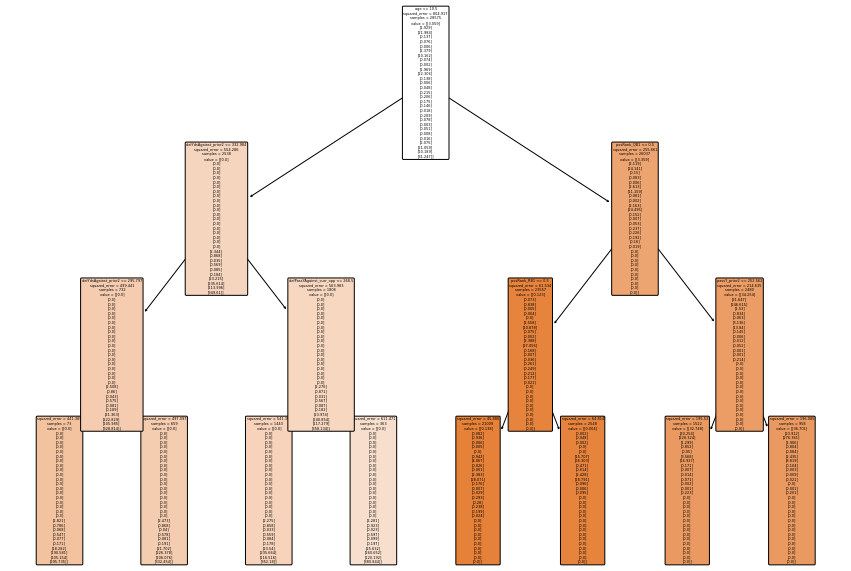

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(regressor.estimators_[0], 
          feature_names=X.columns,
          class_names=y.columns, 
          filled=True, impurity=True, 
          rounded=True)